In [2]:
import pandas as pd
pd.options.display.max_columns=1000
pd.options.display.width=200
pd.options.display.min_rows=40

import matplotlib.pyplot as plt
import seaborn as sns

# __Data:__ 
conflicting clinical genomic classification
<br>
https://www.kaggle.com/kevinarvai/clinvar-conflicting

# __Column Name Descriptions:__
- CHROM Chromosome the variant is located on
<br>
- POS Position on the chromosome the variant is located on.
<br>
- REF Reference Allele
<br>
- ALT Alternate Allele
<br>
- AF_ESP Allele frequencies from GO-ESP
<br>
- AF_EXAC Allele frequencies from ExAC
<br>
- AF_TGP Allele frequencies from the 1000 genomes project
<br>
- CLNDISDB Tag-value pairs of disease database name and identifier, e.g. OMIM:NNNNNN
<br>
- CLNDISDBINCL For included Variant: Tag-value pairs of disease database name and identifier, e.g.OMIM:NNNNNN
<br>
- CLNDN ClinVar's preferred disease name for the concept specified by disease identifiers in CLNDISDB
<br>
- CLNDNINCL For included Variant : ClinVar's preferred disease name for the concept specified by disease identifiers in CLNDISDB
<br>
- CLNHGVS Top-level (primary assembly, alt, or patch) HGVS expression.
<br>
- CLNSIGINCL Clinical significance for a haplotype or genotype that includes this variant. Reported as pairs of VariationID:clinical significance.
<br>
- CLNVC Variant Type
<br>
- CLNVI the variant's clinical sources reported as tag-value pairs of database and variant identifier
<br>
- MC comma separated list of molecular consequence in the form of Sequence Ontology ID|molecular_consequence
<br>
- ORIGIN Allele origin. One or more of the following values may be added: 0 - unknown; 1 - germline; 2 - somatic; 4 - inherited; 8 - paternal; 16 - maternal; 32 - de-novo; 64 - biparental; 128 - uniparental; 256 - not-tested; 512 - tested-inconclusive; 1073741824 - other
<br>
- SSR Variant Suspect Reason Codes. One or more of the following values may be added: 0 - unspecified, 1 - Paralog, 2 - byEST, 4 - oldAlign, 8 - Para_EST, 16 - 1kg_failed, 1024 - other
<br>
- CLASS The binary representation of the target class. 0 represents no conflicting submissions and 1 represents conflicting submissions.
<br>
- Allele the variant allele used to calculate the consequence
<br>
- Consequence Type of consequence: https://useast.ensembl.org/info/genome/variation/prediction/predicted_data.html#consequences
<br>
- IMPACT the impact modifier for the consequence type
<br>
- SYMBOL Gene Name
<br>
- Feature_type type of feature. Currently one of Transcript, RegulatoryFeature, MotifFeature.
<br>
- Feature Ensembl stable ID of feature
<br>
- BIOTYPE Biotype of transcript or regulatory feature
<br>
- EXON the exon number (out of total number)
<br>
- INTRON the intron number (out of total number)
<br>
- cDNA_position relative position of base pair in cDNA sequence
<br>
- CDS_position relative position of base pair in coding sequence
<br>
- Protein_position relative position of amino acid in protein
<br>
- Amino_acids only given if the variant affects the protein-coding sequence
<br>
- Codons the alternative codons with the variant base in upper case
<br>
- DISTANCE Shortest distance from variant to transcript
<br>
- STRAND defined as + (forward) or - (reverse).
<br>
- BAM_EDIT Indicates success or failure of edit using BAM file
<br>
- SIFT the SIFT prediction and/or score, with both given as prediction(score)
<br>
- PolyPhen the PolyPhen prediction and/or score
<br>
- MOTIF_NAME the source and identifier of a transcription factor binding profile aligned at this position
<br>
- MOTIF_POS The relative position of the variation in the aligned TFBP
<br>
- HIGH_INF_POS a flag indicating if the variant falls in a high information position of a transcription factor 
binding profile (TFBP)
<br>
- MOTIF_SCORE_CHANGE The difference in motif score of the reference and variant sequences for the TFBP
<br>
- LoFtool Loss of Function tolerance score for loss of function variants: https://github.com/konradjk/loftee
<br>
- CADD_PHRED Phred-scaled CADD score. A Phred quality score is a measure of the quality of the identification of the nucleobases generated by automated DNA sequencing.A Phred quality score is a measure of the quality of the identification of the nucleobases generated by automated DNA sequencing.
<br>
- CADD_RAW Score of the deleteriousness of variants: http://cadd.gs.washington.edu/
<br>
- BLOSUM62 See: http://rosalind.info/glossary/blosum62/
<br>

In [3]:
df =  pd.read_csv('clinvar_conflicting.csv')

/home/gksullan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVC,CLNVI,MC,ORIGIN,SSR,CLASS,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,BAM_EDIT,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,955563,G,C,0.0000,0.00000,0.0000,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",NaN,NC_000001.10:g.955563G>C,NaN,single_nucleotide_variant,NaN,SO:0001583|missense_variant,1.0,NaN,0,C,missense_variant,MODERATE,AGRN,Transcript,NM_001305275.1,protein_coding,1/39,NaN,61,11,4,R/P,cGg/cCg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.421,11.390,1.133255,-2.0
1,1,955597,G,T,0.0000,0.42418,0.2826,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.955597G>T,NaN,single_nucleotide_variant,NaN,SO:0001819|synonymous_variant,1.0,NaN,0,T,synonymous_variant,LOW,AGRN,Transcript,NM_001305275.1,protein_coding,1/39,NaN,95,45,15,P,ccG/ccT,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.421,8.150,0.599088,NaN
2,1,955619,G,C,0.0000,0.03475,0.0088,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",NaN,NC_000001.10:g.955619G>C,NaN,single_nucleotide_variant,NaN,SO:0001583|missense_variant,1.0,NaN,1,C,missense_variant,MODERATE,AGRN,Transcript,NM_001305275.1,protein_coding,1/39,NaN,117,67,23,V/L,Gtc/Ctc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.421,3.288,0.069819,1.0
3,1,957640,C,T,0.0318,0.02016,0.0328,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",NaN,NC_000001.10:g.957640C>T,NaN,single_nucleotide_variant,NaN,SO:0001819|synonymous_variant,1.0,NaN,0,T,synonymous_variant,LOW,AGRN,Transcript,NM_001305275.1,protein_coding,2/39,NaN,311,261,87,D,gaC/gaT,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.421,12.560,1.356499,NaN
4,1,976059,C,T,0.0000,0.00022,0.0010,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.976059C>T,NaN,single_nucleotide_variant,NaN,SO:0001819|synonymous_variant,1.0,NaN,1,T,synonymous_variant,LOW,AGRN,Transcript,NM_001305275.1,protein_coding,4/39,NaN,576,526,176,L,Ctg/Ttg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.421,17.740,2.234711,NaN


In [5]:
df.shape

(65188, 46)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
CHROM                 65188 non-null object
POS                   65188 non-null int64
REF                   65188 non-null object
ALT                   65188 non-null object
AF_ESP                65188 non-null float64
AF_EXAC               65188 non-null float64
AF_TGP                65188 non-null float64
CLNDISDB              65188 non-null object
CLNDISDBINCL          76 non-null object
CLNDN                 65188 non-null object
CLNDNINCL             76 non-null object
CLNHGVS               65188 non-null object
CLNSIGINCL            76 non-null object
CLNVC                 65188 non-null object
CLNVI                 27659 non-null object
MC                    58219 non-null object
ORIGIN                59065 non-null float64
SSR                   104 non-null float64
CLASS                 65188 non-null int64
Allele                65188 non-null object
Consequence        

In [7]:
corr = df.corr()

In [8]:
df.describe(include='all')

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVC,CLNVI,MC,ORIGIN,SSR,CLASS,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,BAM_EDIT,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
count,65188.0,6.518800e+04,65188,65188,65188.000000,65188.000000,65188.000000,65188,76,65188,76,65188,76,65188,27659,58219,59065.000000,104.000000,65188.000000,65188,65188,65188,65172,65174,65174,65172,56295,8803,56304,55233,55233,55184,55184,108.000000,65174.000000,31969,24836,24796,2,2.0,2,2.000000,60975.000000,64096.000000,64096.000000,25593.000000
unique,25.0,NaN,866,458,NaN,NaN,NaN,9234,48,9260,54,65188,68,7,26289,89,NaN,NaN,NaN,374,48,4,2328,2,2369,2,3264,1929,13970,13663,7339,1262,2220,NaN,NaN,2,4,4,2,NaN,1,NaN,NaN,NaN,NaN,NaN
top,2.0,NaN,C,T,NaN,NaN,NaN,MedGen:CN169374,.,not_specified,not_specified,NC_000011.9:g.94203742C>T,190388:Pathogenic,single_nucleotide_variant,UniProtKB_(protein):P04637,SO:0001583|missense_variant,NaN,NaN,NaN,T,missense_variant,MODERATE,TTN,Transcript,NM_001267550.1,protein_coding,16/16,47/362,852,1,1,A,cGg/cAg,NaN,NaN,OK,deleterious,benign,FOXA1:MA0546.1,NaN,N,NaN,NaN,NaN,NaN,NaN
freq,8645.0,NaN,21798,20409,NaN,NaN,NaN,5344,7,5344,7,1,2,61281,124,23034,NaN,NaN,NaN,19991,31444,33212,2765,65172,2765,65158,1129,93,31,36,100,2005,915,NaN,NaN,31707,11500,13329,1,NaN,2,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.757594e+07,NaN,NaN,0.014511,0.014492,0.015263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.272869,2.298077,0.252102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,825.731481,-0.006659,NaN,NaN,NaN,NaN,1.0,NaN,-0.080000,0.345058,15.685616,2.554131,-0.402258
std,NaN,5.974051e+07,NaN,NaN,0.057795,0.059542,0.059527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.343258,4.237786,0.434223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1069.363315,0.999985,NaN,NaN,NaN,NaN,0.0,NaN,0.024042,0.361238,10.836350,2.961553,1.872684
min,NaN,9.610000e+02,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-1.000000,NaN,NaN,NaN,NaN,1.0,NaN,-0.097000,0.000069,0.001000,-5.477391,-3.000000
25%,NaN,3.254179e+07,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.500000,-1.000000,NaN,NaN,NaN,NaN,1.0,NaN,-0.088500,0.024300,7.141000,0.462951,-2.000000
50%,NaN,5.797021e+07,NaN,NaN,0.000000,0.000040,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,469.000000,-1.000000,NaN,NaN,NaN,NaN,1.0,NaN,-0.080000,0.157000,14.090000,1.642948,-1.000000
75%,NaN,1.127454e+08,NaN,NaN,0.001200,0.001230,0.001600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415.000000,1.000000,NaN,NaN,NaN,NaN,1.0,NaN,-0.071500,0.710000,24.100000,4.381392,1.000000


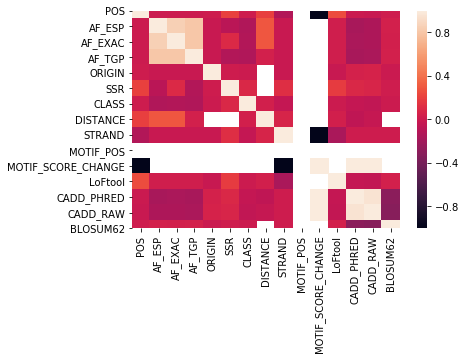

In [9]:
sns.heatmap(corr)



In [10]:
#find the number of null values in each columns
df.isnull().sum()

CHROM                     0
POS                       0
REF                       0
ALT                       0
AF_ESP                    0
AF_EXAC                   0
AF_TGP                    0
CLNDISDB                  0
CLNDISDBINCL          65112
CLNDN                     0
CLNDNINCL             65112
CLNHGVS                   0
CLNSIGINCL            65112
CLNVC                     0
CLNVI                 37529
MC                     6969
ORIGIN                 6123
SSR                   65084
CLASS                     0
Allele                    0
Consequence               0
IMPACT                    0
SYMBOL                   16
Feature_type             14
Feature                  14
BIOTYPE                  16
EXON                   8893
INTRON                56385
cDNA_position          8884
CDS_position           9955
Protein_position       9955
Amino_acids           10004
Codons                10004
DISTANCE              65080
STRAND                   14
BAM_EDIT            

In [11]:
#symbol is gene name, look for any most frequently reported gene variants
df['SYMBOL'].value_counts().head(25)

TTN        2765
BRCA2      1934
ATM        1909
APC        1228
BRCA1      1075
MSH6       1048
LDLR        905
PALB2       794
NF1         732
TSC2        640
BRIP1       627
PMS2        600
MSH2        596
POLE        571
CDH1        553
CHEK2       491
BARD1       490
SMARCA4     451
MYBPC3      441
RAD50       426
SYNE1       422
TP53        420
POLD1       404
NBN         397
MLH1        395
Name: SYMBOL, dtype: int64

In [12]:
#drop columns that have all (or almost all) null values
df2 = df.loc[:,df.isnull().sum() < 65180]

In [13]:
df2.head()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVC,CLNVI,MC,ORIGIN,SSR,CLASS,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,BAM_EDIT,SIFT,PolyPhen,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,955563,G,C,0.0000,0.00000,0.0000,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",NaN,NC_000001.10:g.955563G>C,NaN,single_nucleotide_variant,NaN,SO:0001583|missense_variant,1.0,NaN,0,C,missense_variant,MODERATE,AGRN,Transcript,NM_001305275.1,protein_coding,1/39,NaN,61,11,4,R/P,cGg/cCg,NaN,1.0,NaN,NaN,NaN,0.421,11.390,1.133255,-2.0
1,1,955597,G,T,0.0000,0.42418,0.2826,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.955597G>T,NaN,single_nucleotide_variant,NaN,SO:0001819|synonymous_variant,1.0,NaN,0,T,synonymous_variant,LOW,AGRN,Transcript,NM_001305275.1,protein_coding,1/39,NaN,95,45,15,P,ccG/ccT,NaN,1.0,NaN,NaN,NaN,0.421,8.150,0.599088,NaN
2,1,955619,G,C,0.0000,0.03475,0.0088,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",NaN,NC_000001.10:g.955619G>C,NaN,single_nucleotide_variant,NaN,SO:0001583|missense_variant,1.0,NaN,1,C,missense_variant,MODERATE,AGRN,Transcript,NM_001305275.1,protein_coding,1/39,NaN,117,67,23,V/L,Gtc/Ctc,NaN,1.0,NaN,NaN,NaN,0.421,3.288,0.069819,1.0
3,1,957640,C,T,0.0318,0.02016,0.0328,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",NaN,NC_000001.10:g.957640C>T,NaN,single_nucleotide_variant,NaN,SO:0001819|synonymous_variant,1.0,NaN,0,T,synonymous_variant,LOW,AGRN,Transcript,NM_001305275.1,protein_coding,2/39,NaN,311,261,87,D,gaC/gaT,NaN,1.0,NaN,NaN,NaN,0.421,12.560,1.356499,NaN
4,1,976059,C,T,0.0000,0.00022,0.0010,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.976059C>T,NaN,single_nucleotide_variant,NaN,SO:0001819|synonymous_variant,1.0,NaN,1,T,synonymous_variant,LOW,AGRN,Transcript,NM_001305275.1,protein_coding,4/39,NaN,576,526,176,L,Ctg/Ttg,NaN,1.0,NaN,NaN,NaN,0.421,17.740,2.234711,NaN


In [14]:
df2.shape

(65188, 42)

In [15]:
#check to see all columns remaining have more than one unique value
df2.nunique()

CHROM                  25
POS                 63115
REF                   866
ALT                   458
AF_ESP               2842
AF_EXAC              6667
AF_TGP               2087
CLNDISDB             9234
CLNDISDBINCL           48
CLNDN                9260
CLNDNINCL              54
CLNHGVS             65188
CLNSIGINCL             68
CLNVC                   7
CLNVI               26289
MC                     89
ORIGIN                 27
SSR                     2
CLASS                   2
Allele                374
Consequence            48
IMPACT                  4
SYMBOL               2328
Feature_type            2
Feature              2369
BIOTYPE                 2
EXON                 3264
INTRON               1929
cDNA_position       13970
CDS_position        13663
Protein_position     7339
Amino_acids          1262
Codons               2220
DISTANCE               96
STRAND                  2
BAM_EDIT                2
SIFT                    4
PolyPhen                4
LoFtool     

AF_ESP, AF_EXAC, and AF_TGP refer to the same attribute, Allele Frequency, but each is taken from a different source. Might be helpul to combine into one/only use one?
#INTRON and EXON columns have so many null values because an entry is either an intron or exon. It looks like there are more exons (makes sense because those are expressed genes and would be more likely to be screened)
#It looks like there is a good number of distinct disease types (col name: CLNDN) = 9260


In [16]:
df2.columns

Index(['CHROM', 'POS', 'REF', 'ALT', 'AF_ESP', 'AF_EXAC', 'AF_TGP', 'CLNDISDB', 'CLNDISDBINCL', 'CLNDN', 'CLNDNINCL', 'CLNHGVS', 'CLNSIGINCL', 'CLNVC', 'CLNVI', 'MC', 'ORIGIN', 'SSR', 'CLASS',
       'Allele', 'Consequence', 'IMPACT', 'SYMBOL', 'Feature_type', 'Feature', 'BIOTYPE', 'EXON', 'INTRON', 'cDNA_position', 'CDS_position', 'Protein_position', 'Amino_acids', 'Codons', 'DISTANCE',
       'STRAND', 'BAM_EDIT', 'SIFT', 'PolyPhen', 'LoFtool', 'CADD_PHRED', 'CADD_RAW', 'BLOSUM62'],
      dtype='object')

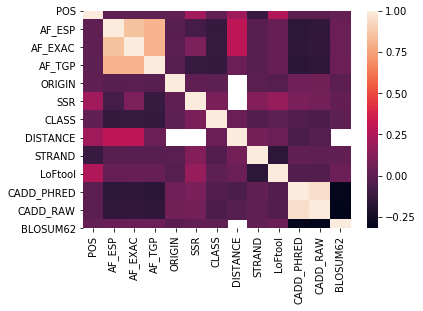

In [17]:
corr2 = df2.corr()
sns.heatmap(corr2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f498af851d0>,
      dtype=object)

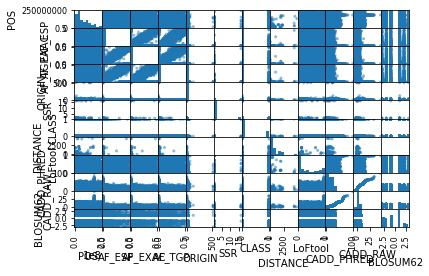

In [18]:
#create a scatter matrix of numerical features

pd.plotting.scatter_matrix(df2[['CHROM', 'POS', 'AF_ESP', 'AF_EXAC', 'AF_TGP', 'ORIGIN', 'SSR', 'CLASS','Feature', 'DISTANCE', 'BAM_EDIT', 'SIFT', 'PolyPhen', 'LoFtool','CADD_PHRED','CADD_RAW', 'BLOSUM62']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f498026eba8>,
      dtype=object)

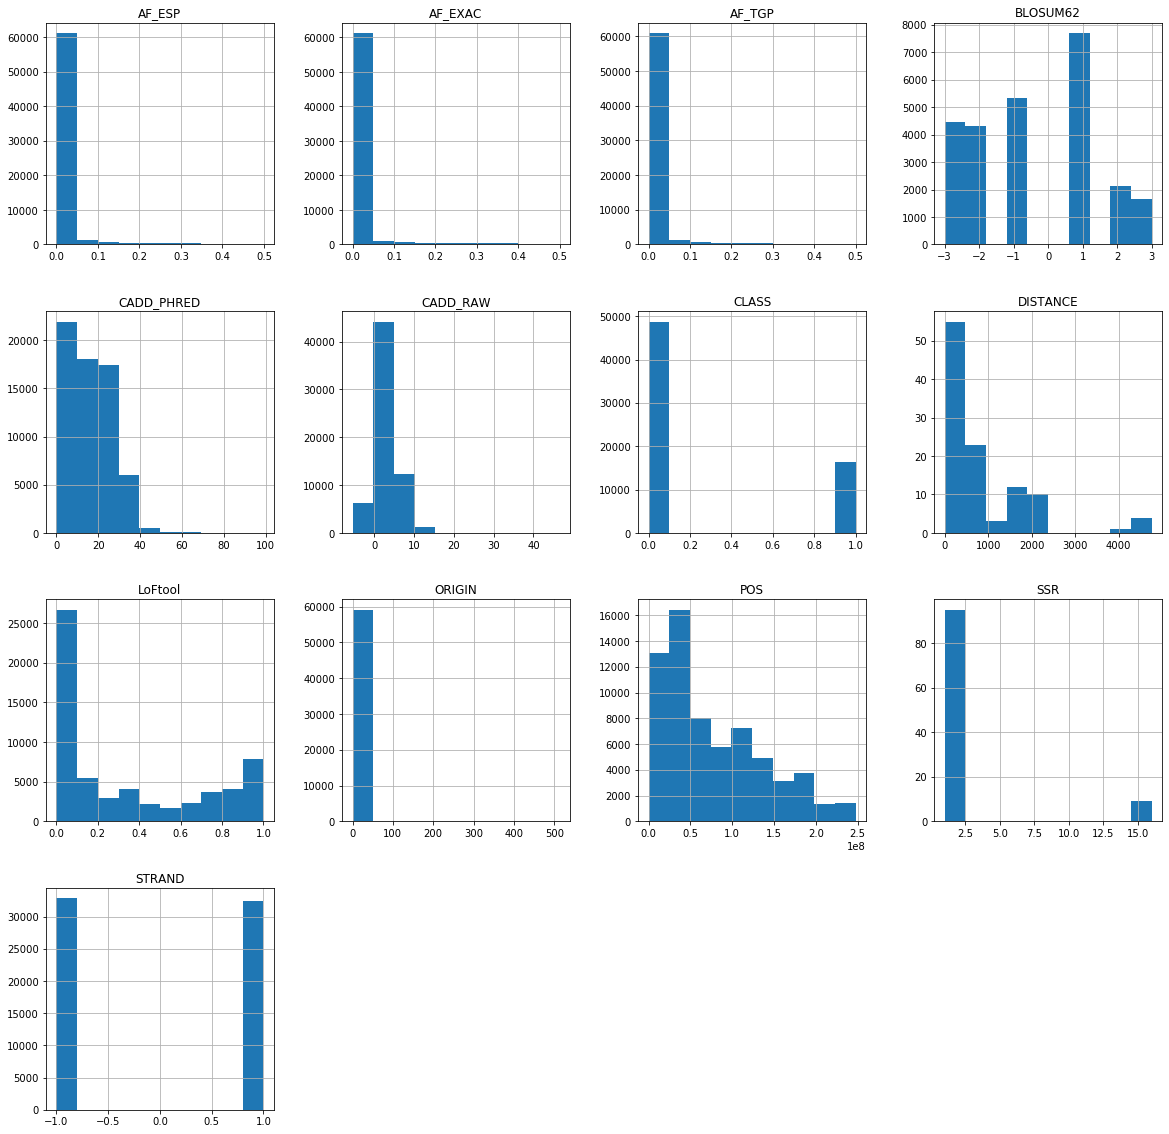

In [19]:
df2.hist(figsize=(20,20))

CLASS
0    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
1    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
dtype: object

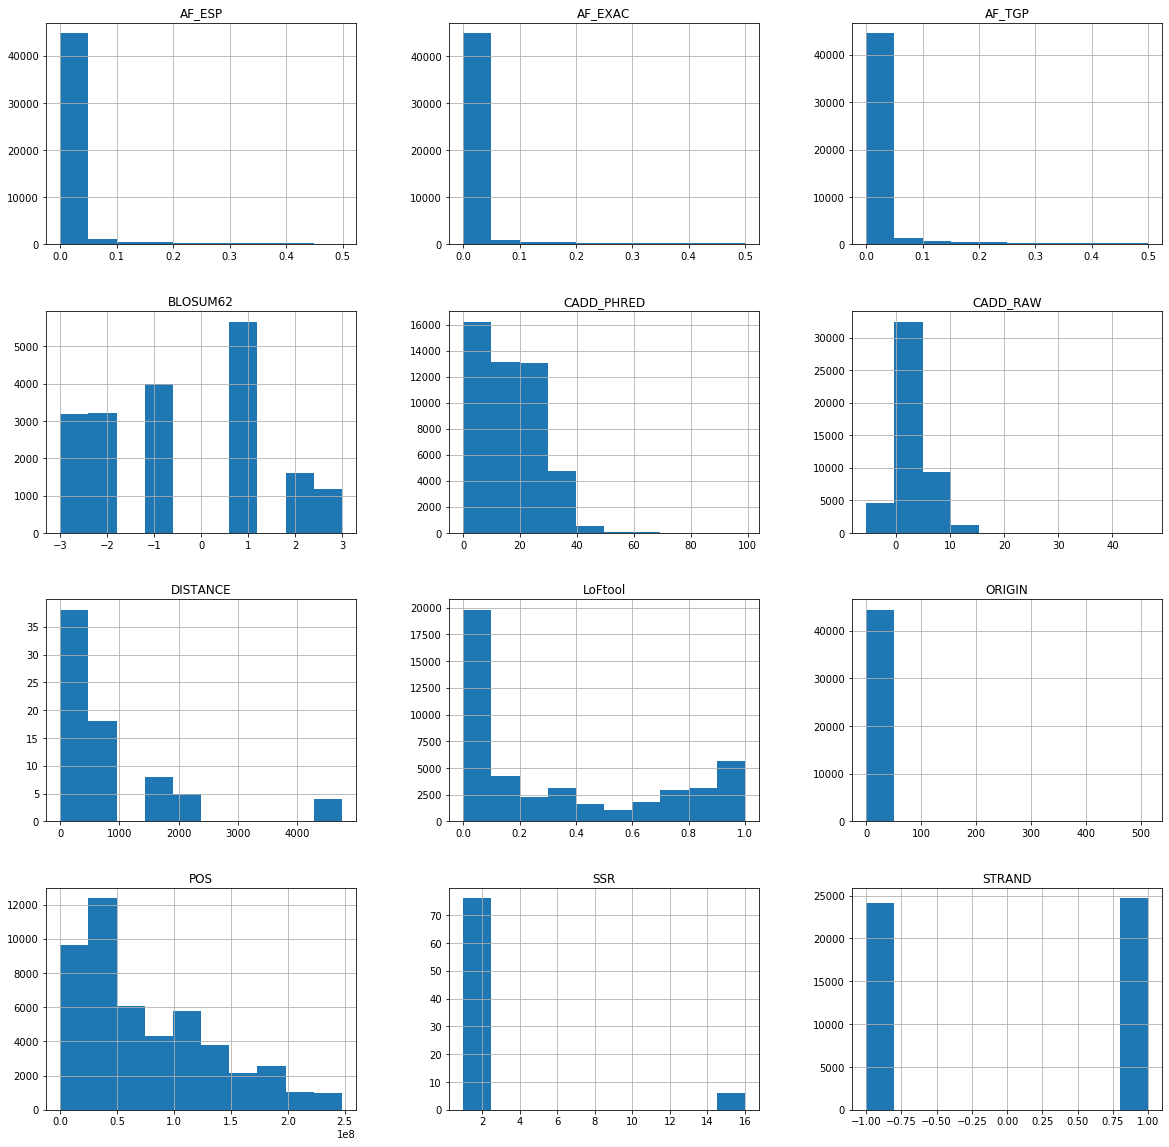

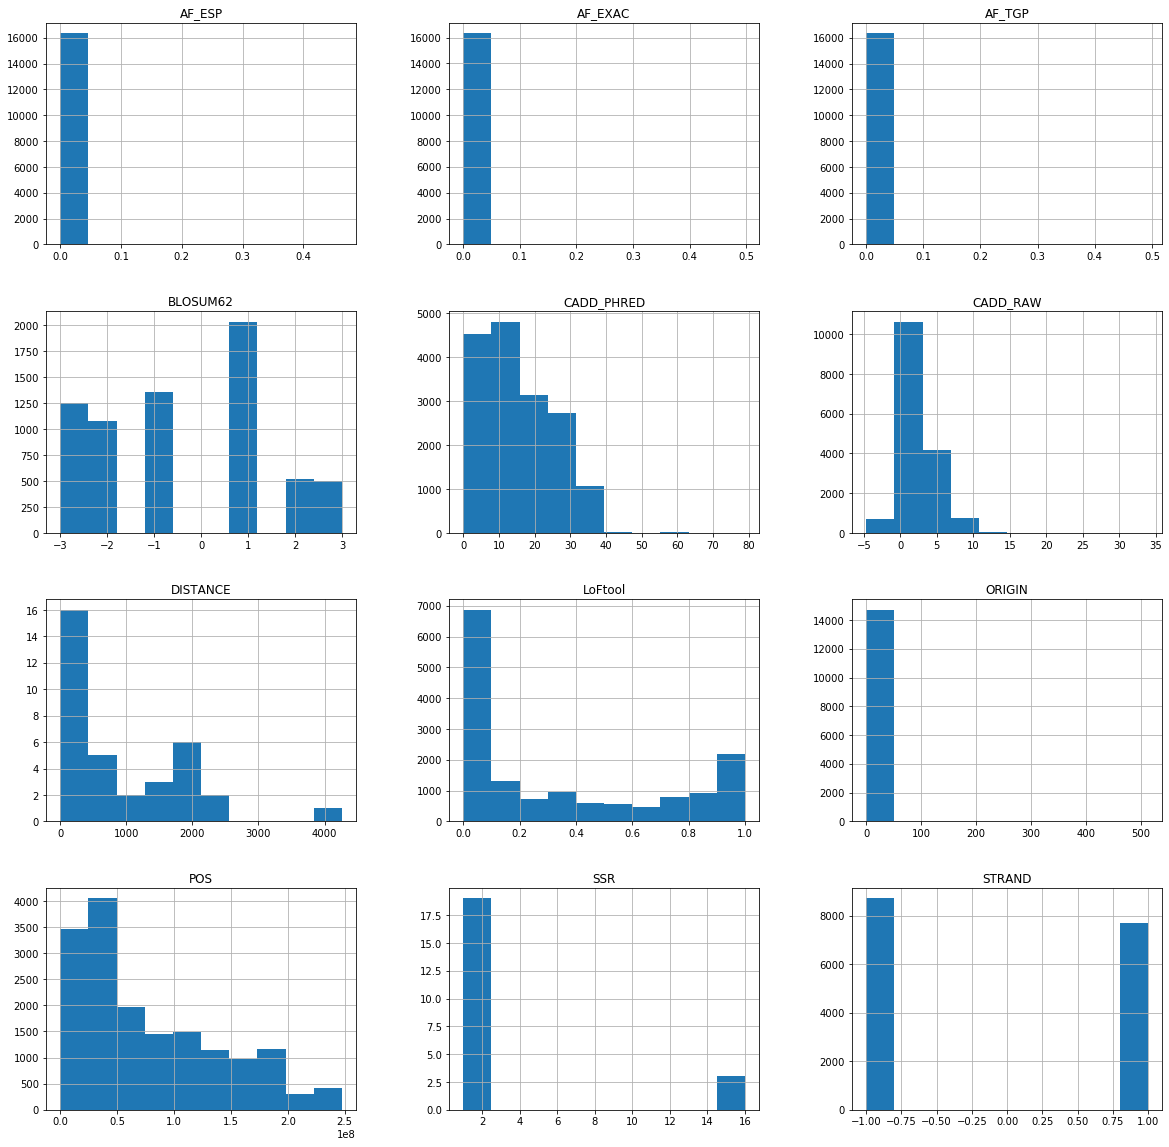

In [20]:
df2.groupby('CLASS').hist(figsize=(20,20))

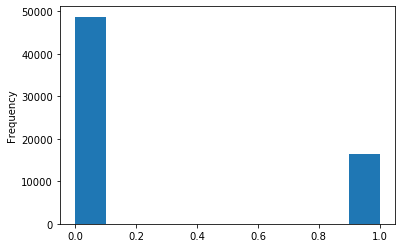

In [21]:
df2['CLASS'].plot(kind='hist')

/home/gksullan/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/gksullan/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


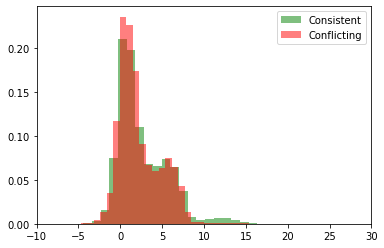

In [30]:
#2 color histogram plot of CLASS by CADD score=a prediction of deleteriousness of a variant
x0 = df2.loc[df.CLASS==0, 'CADD_RAW']
x1 = df2.loc[df.CLASS==1, 'CADD_RAW']

plt.hist(x0, alpha=0.5, bins=50, color='green', density=True, stacked=True, label='Consistent')
plt.hist(x1, alpha=0.5, bins=50, color='red', density=True, stacked=True, label='Conflicting')
plt.xlim((-10,30))
plt.legend();

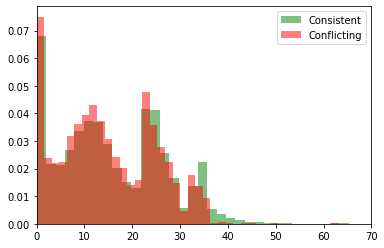

In [31]:
#2 color histogram plot of CLASS by CADD score=a prediction of deleteriousness of a variant
x0 = df2.loc[df.CLASS==0, 'CADD_PHRED']
x1 = df2.loc[df.CLASS==1, 'CADD_PHRED']

plt.hist(x0, alpha=0.5, bins=50, color='green', density=True, stacked=True, label='Consistent')
plt.hist(x1, alpha=0.5, bins=50, color='red', density=True, stacked=True, label='Conflicting')
plt.xlim((0,70))
plt.legend();

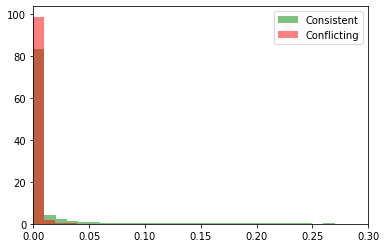

In [32]:
x0 = df2.loc[df.CLASS==0, 'AF_TGP']
x1 = df2.loc[df.CLASS==1, 'AF_TGP']

plt.hist(x0, alpha=0.5, bins=50, color='green', density=True, stacked=True, label='Consistent')
plt.hist(x1, alpha=0.5, bins=50, color='red', density=True, stacked=True, label='Conflicting')
plt.xlim((0,0.3))
plt.legend();

/home/gksullan/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/gksullan/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


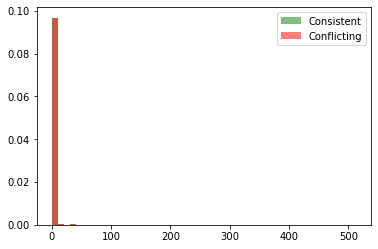

In [22]:
x0 = df2.loc[df.CLASS==0, 'ORIGIN']
x1 = df2.loc[df.CLASS==1, 'ORIGIN']

plt.hist(x0, alpha=0.5, bins=50, color='green', density=True, stacked=True, label='Consistent')
plt.hist(x1, alpha=0.5, bins=50, color='red', density=True, stacked=True, label='Conflicting')

plt.legend();

In [35]:
df.CHROM.value_counts()

2     8645
17    5394
11    4846
1     4454
19    3911
5     3643
7     2867
16    2771
12    2750
9     2744
13    2646
3     2529
10    2341
6     2159
14    1974
X     1926
8     1852
15    1725
4     1206
16    1156
22    1135
18     896
21     843
20     759
MT      16
Name: CHROM, dtype: int64

In [26]:
df.SYMBOL.to_csv('GeneID.csv')

/home/gksullan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [28]:
df.SYMBOL

0          AGRN
1          AGRN
2          AGRN
3          AGRN
4          AGRN
5          AGRN
6          AGRN
7          AGRN
8          AGRN
9          AGRN
10         AGRN
11         AGRN
12         AGRN
13         AGRN
14         AGRN
15         AGRN
16         AGRN
17         AGRN
18         AGRN
19         AGRN
          ...  
65168        F8
65169        F8
65170    RAB39B
65171     CLIC2
65172       NaN
65173       NaN
65174       NaN
65175       NaN
65176       NaN
65177       NaN
65178       NaN
65179       NaN
65180       NaN
65181       NaN
65182       NaN
65183       NaN
65184       NaN
65185       NaN
65186       NaN
65187       NaN
Name: SYMBOL, Length: 65188, dtype: object